# Time Complexity

Two programs need not be the same, even if they always give the same output for the same input.

**Remark:**
This is not the case in Mathematics. For two functions $f,g: D \mapsto R$

$$
\forall x \in D, \  f(x) = g(x) \iff f = g
$$

A program has a source code, which usually implements an *algorithm*.
An *algorithm* is an abstract procedure, usually describable by "pseudocode", which is then implementable in various programming languages and architectures. (In a way, these are equivalence classes of codes potentially written in different programming languages.)

A program can have several properties besides its input-output structure:
- How long is its source code (in a given language or on an architecture)
    - *Program length complexity*, related to [*Kolmogorov Complexity*](https://en.wikipedia.org/wiki/Kolmogorov_complexity)
- How long does it take to execute
    - Measuring the "scaling" of the execution time as the function of the "size" of the input gives *Time Complexity* (often depends only on the algorithm implemented)
- Robustness
    - How reliably does it function if random noise can alter the variables or the code itself? (Important in spacecraft where the radiation level is much higher or GPU-intensive computations where random flips measurably occur.) Related to [Fault Tolerance](https://en.wikipedia.org/wiki/Fault_tolerance)
- Vulnerabilities against various "attacks"
    - Important, for instance, in cryptographic applications, and [cybersecurity](https://owasp.org/www-project-top-ten/)
- "Elegance" or "Cleanness", related to readability and maintainability
    - How much time and effort is needed from another developer (including your future self) to understand, debug, change or enhance the code? This is partially a cultural question but surprisingly important in real-world programming and software development.

## Question:

- What is Time Complexity?
- Why is it important?
- How can it be measured or estimated?

## Abstraction:

We will measure the Execution time of specific programs written in a specific programming language and executed on a specific computer.

We will say, that two programs $\text{\tt P}$ and $\text{\tt Q}$ are giving the same output, if for any input $\text{\tt in} \in D$ on a domain $D$, the two progrms give the same output:
$\text{\tt P}(\text{\tt in}) = \text{\tt Q}(\text{\tt in})= \text{\tt out}$.

For simplicity, we will investigate programs which take integer inputs:
$\text{\tt in} \in \mathbb{N}$.

In this simple case, the "size" of the input is simply the value of the integer input.

We will measure the execution time of various programs as a function of the size of their input:

$$
T: \mathbb{N} \mapsto \mathbb{R}_+
$$

And observe the "scaling" of these empirical time sequences.

## Computation:

In [ ]:
# Potentially you need to install matplotlib.
# This can be done with:

# pip install matplotlib

In [16]:
# Importing necessary libraries

import time # For measuring execution time
import matplotlib.pyplot as plt # For plotting

### Summation of integers

First, we will compare two `Python` programs, which compute the sum of the first $n$ integers (from $0$ to $n-1$):

$$
\text{\tt sum} (n) = \sum_{i=0}^{n-1} i
$$

In [4]:
# Naive implementation of the sum of the first n integers

def sum_1(n):
    sum = 0
    for i in range(n):
        sum = sum + i
    return sum

In [7]:
sum_1(11)

55

A famous [anecdote](https://hsm.stackexchange.com/questions/384/did-gauss-find-the-formula-for-123-ldotsn-2n-1n-in-elementary-school) links the formula to the young Carl Friedrich Gauss, who was asked to compute the sum of the first $100$ integers in primary school. He surprised his teacher by giving the answer in a few seconds, observing that the sum can be rearranged in pairs.
Adding the numbers from $1$ to $10$ gives:

$$
1 + 2 + 3 + 4 + 5 + 6 + 7 + 8 + 9 + 10 = (1+10) + (2+9) + \dots + (5 + 6) = 5 \times 11 = 55
$$

Generalizing this, we can see that the sum of the first $n$ integers is:
$$
\sum_{i=0}^{n-1} i = \frac{n(n-1)}{2}
$$

(The [formula](https://en.wikipedia.org/wiki/Arithmetic_progression) is much older than Gauss. It has already been known to the ancient Greeks (and several other ancient cultures). Archimedes was almost surely aware of it (he [used the formula](https://www.goodreads.com/book/show/42585112-calculus-reordered) for the sum of square numbers in "On Spirals"), while later Hypsicles [proved and used](https://archive.org/details/historyofgreekma029268mbp/page/216/mode/2up) a more general formula for arithmetic progressions.)

In [8]:
# Formula based implementation of the sum of the first n integers

def sum_2(n):
    return n * (n - 1) // 2

In [9]:
sum_2(11)

55

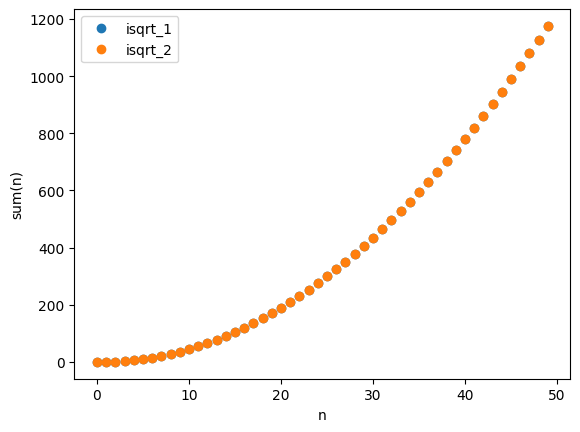

In [102]:
plt.plot([sum_1(i) for i in range(50)], 'o', label='isqrt_1')
plt.plot([sum_2(i) for i in range(50)], 'o', label='isqrt_2')

plt.xlabel('n')
plt.ylabel('sum(n)')

plt.legend()

plt.show()

#### Execution times

Naive implementation:

In [11]:
# Measuring execution time in seconds

start = time.process_time()
sum_1(10**8)    
runing_time = time.process_time() - start

print(runing_time)

3.8956244929999997


In [32]:
# Maiking a list of execution times
# A list with 100 items, where the input grows by 100000 = 10**5 in each step

time_list_1 = []
n=0

for i in range(100):
    start = time.process_time()
    sum_1(n)    
    runing_time = time.process_time() - start
    time_list_1.append(runing_time)
    n = n + 10**5

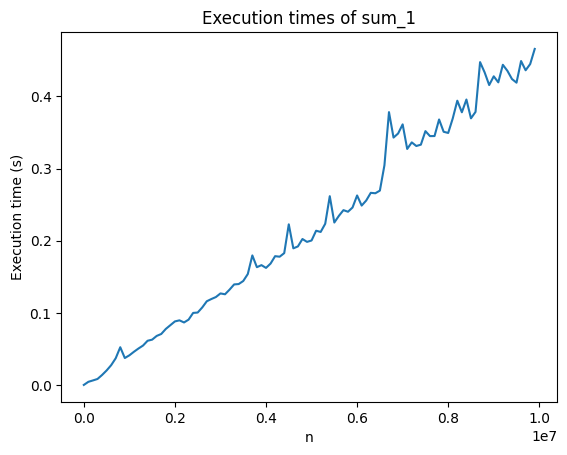

In [35]:
plt.plot(range(0, 100 * 10**5, 10**5),time_list_1)
plt.xlabel('n')
plt.ylabel('Execution time (s)')
plt.title('Execution times of sum_1')

# Show the plot
plt.show()

Formula based implementation:

In [46]:
time_list_2 = []
n=0

for i in range(100):
    start = time.process_time()
    sum_2(n)    
    runing_time = time.process_time() - start
    time_list_2.append(runing_time)
    n = n + 10**5

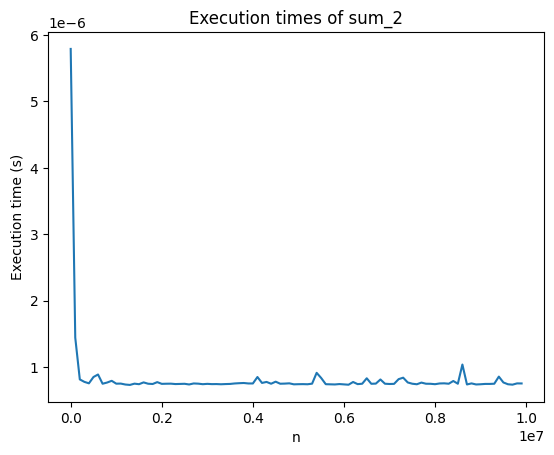

In [47]:
plt.plot(range(0, 100 * 10**5, 10**5),time_list_2)
plt.xlabel('n')
plt.ylabel('Execution time (s)')
plt.title('Execution times of sum_2')

# Show the plot
plt.show()

**Observation:** For the naive implementation the execution time is well approximated by a linear function of the input size $n$:
$$
T_1(n) \approx b \times n, \quad b \in \mathbb{R}_+
$$

For the formula based implementation the execution time is close to a constant:

$$
T_2(n) \approx a, \quad a \in \mathbb{R}_+
$$

At least on the input range $n \in [0, 10^7]$.

This is compatible with the theoretical time complexity of the two implementations:
$$
T_1(n) = \mathcal{O}(n), \quad T_2(n) = \mathcal{O}(1)
$$

**Remark:** For very large inputs even the computation of the formula will take more and more time as the size of the input grows.

Let see how the execution time of the formula scales for very large inputs:

In [160]:
# We will use an exponentially growing list of inputs
# A list with 1000 items, where the input grows by a factor of 10**40 
# (one followed by 40 zeros) in each step. 
# Meanining that the last imput is 10**(40*1000) = 10**40000 
# (one followed by 40000 zeros)

time_list_2_large = []
n=1

for i in range(1000):
    start = time.process_time()
    sum_2(n)    
    runing_time = time.process_time() - start
    time_list_2_large.append(runing_time)
    n = n * 10**40

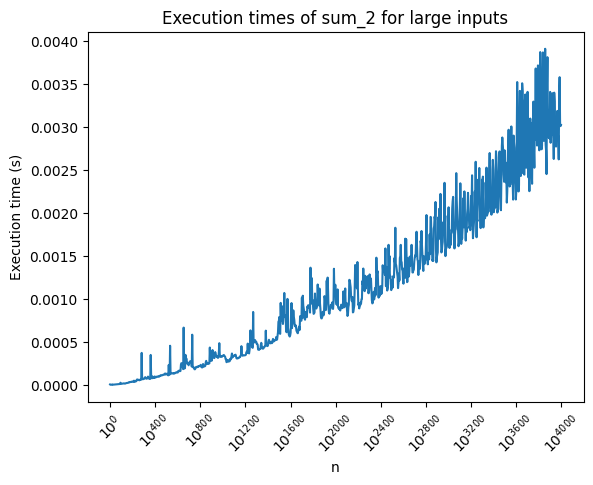

In [161]:
plt.plot(time_list_2_large)
plt.xlabel('n')
plt.ylabel('Execution time (s)')
plt.title('Execution times of sum_2 for large inputs')

# Choose ticks at intervals (e.g., every 100 elements)
tick_step = 100
ticks = range(0, len(time_list_2_large)+1, tick_step)

# Create LaTeX labels properly
tick_labels = [r'$10^{' + str(40 * 10 * i) + r'}$' for i in range(len(ticks))]

# Apply them
plt.xticks(ticks, tick_labels)

# Optional: rotate the labels if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()

### Integer Square Root

For an integer $n$ the integer square root is defined as the largest integer $k$ such that $k^2 \leq n$.

$$
\text{\tt isqrt}(n) = \max \{ k \in \mathbb{N} \mid k^2 \leq n \}
$$

Or by floor function:
$$
\text{\tt isqrt}(n) = \lfloor \sqrt{n} \rfloor
$$

In [83]:
# Simple implementation of the discrete square root function

def isqrt_1(n):
    for i in range(n+2):
        if i * i > n:
            return i-1
    return 0

In [84]:
# Binary search based implementation of the discrete square root function

def isqrt_2(n):
    left = 0 
    right = n

    result = 0
    
    while left <= right:
        mid = (left + right) // 2  # changed mid calculation
        if mid * mid == n:
            return mid
        elif mid * mid < n:
            result = mid
            left = mid + 1
        else:
            right = mid - 1
    
    return result

In [87]:
isqrt_1(1000)


31

In [89]:
isqrt_2(1000)

31

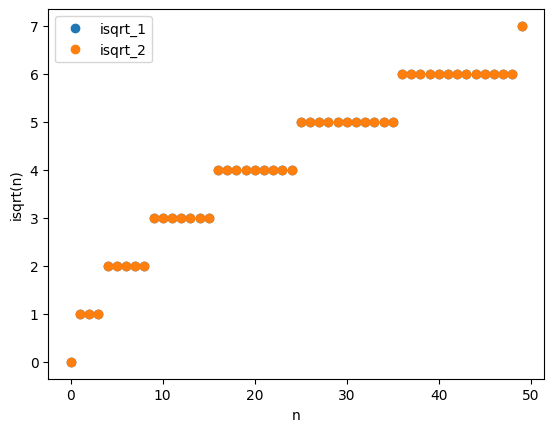

In [106]:
plt.plot([isqrt_1(i) for i in range(50)], 'o', label='isqrt_1')
plt.plot([isqrt_2(i) for i in range(50)], 'o', label='isqrt_2')

plt.xlabel('n')
plt.ylabel('isqrt(n)')

plt.legend()

plt.show()

#### Execution times

In [127]:
# Maiking a list of execution times
# A list with 400 items, where the input grows by 1000000000 = 10**9 in each step

time_list_1 = []
n=0

for i in range(400):
    start = time.process_time()
    isqrt_1(n)    
    runing_time = time.process_time() - start
    time_list_1.append(runing_time)
    n = n + 10**9

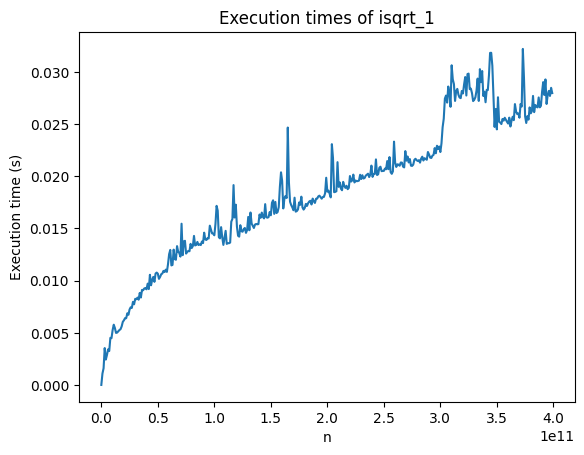

In [130]:
plt.plot(range(0, 400 * 10**9, 10**9),time_list_1)
plt.xlabel('n')
plt.ylabel('Execution time (s)')
plt.title('Execution times of isqrt_1')

# Show the plot
plt.show()

In [129]:
time_list_2 = []
n=0

for i in range(400):
    start = time.process_time()
    isqrt_2(n)    
    runing_time = time.process_time() - start
    time_list_2.append(runing_time)
    n = n + 10**9

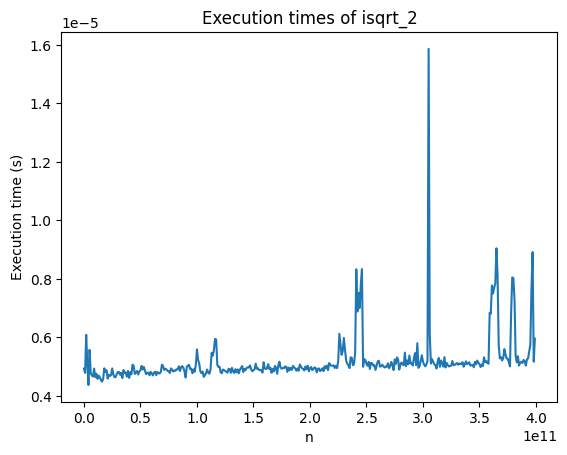

In [131]:
plt.plot(range(0, 400 * 10**9, 10**9),time_list_2)
plt.xlabel('n')
plt.ylabel('Execution time (s)')
plt.title('Execution times of isqrt_2')

# Show the plot
plt.show()

**Observation:** For the simple implementation the execution time is well approximated by the expected $\sqrt{n}$ function of the input size $n$:
$$
T_1(n) \approx b \times \sqrt{n}, \quad b \in \mathbb{R}_+
$$

For the binary search based implementation the execution time grows very mildly with the input size $n$:

$$
T_2(n) \ll T_1(n)
$$

At least on the input range $n \in [0, 4 \times 10^{11}]$.

In theory, the time complexity of the two implementations is:
$$
T_1(n) = \mathcal{O}(\sqrt{n}), \quad T_2(n) = \mathcal{O}((\log n)^{1 + \log_2 3}) = \mathcal{O}((\log n)^{2.585}) 
$$

(Because [Python](https://discuss.python.org/t/faster-large-integer-multiplication/13300) uses [Karatsuba multiplication](https://en.wikipedia.org/wiki/Karatsuba_algorithm) for large integers, the time complexity of the multiplication is $\mathcal{O}(n^{\log_2 3})$.)

In [170]:
time_list_2_large = []
n=1

for i in range(200):
    start = time.process_time()
    isqrt_2(n)    
    runing_time = time.process_time() - start
    time_list_2_large.append(runing_time)
    n = n * 10 ** 6

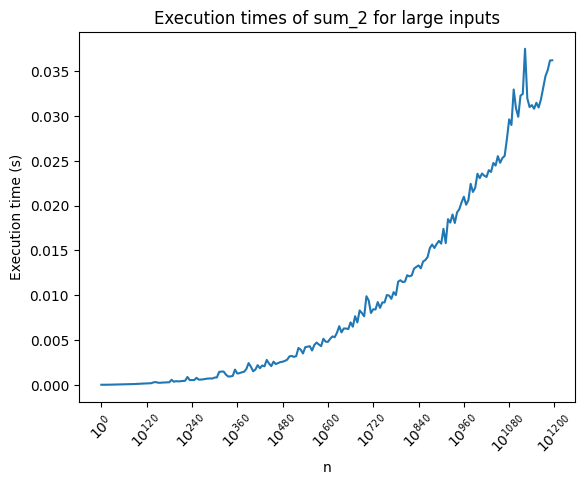

In [171]:
plt.plot(time_list_2_large)
plt.xlabel('n')
plt.ylabel('Execution time (s)')
plt.title('Execution times of sum_2 for large inputs')

# Choose ticks at intervals (e.g., every 100 elements)
tick_step = 20
ticks = range(0, len(time_list_2_large)+1, tick_step)

# Create LaTeX labels properly
tick_labels = [r'$10^{' + str(6 * 20 * i) + r'}$' for i in range(len(ticks))]

# Apply them
plt.xticks(ticks, tick_labels)

# Optional: rotate the labels if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()

## Interpretation:

The construction of a program, and the choice of the *algorithm* influences significantly the performance and applicability of the program.
Time complexity is not only a theoretical concept, but a pattern, applicable to real world programming, relating evaluation time to the size of the input.

## Questions II:

- Does a program with lower time complexity always run faster than a program with higher time complexity?

## Abstraction II:

Same as before.

## Computation II:

Let see how the different implementations of the integer square root run for small inputs.

To tame the time fluctuations, we will run the programs $1000$ times and take the average execution time.

In [172]:
# Obtaining the execution time of the isqrt_1 and isqrt_2 functions
# for inputs from 0 to 3000

time_list_1_small = []
n=0

for i in range(3000):
    start = time.process_time()
    for i in range(1000):
        isqrt_1(n)    
    runing_time = time.process_time() - start
    time_list_1_small.append(runing_time / 1000)
    n = n + 1

time_list_2_small = []
n=0

for i in range(3000):
    start = time.process_time()
    for i in range(1000):
        isqrt_2(n)    
    runing_time = time.process_time() - start
    time_list_2_small.append(runing_time / 1000)
    n = n + 1

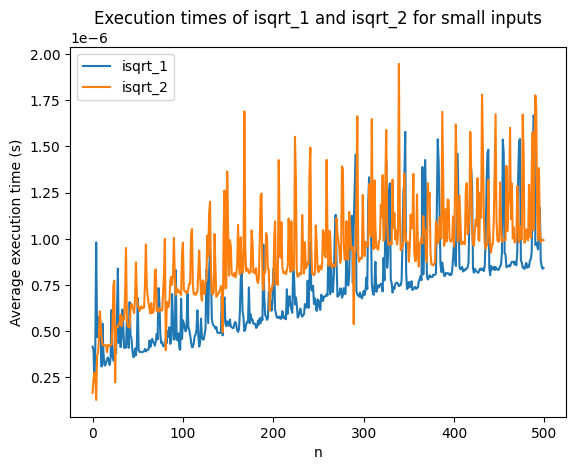

In [181]:
# Plotting the first 500 elements of the lists

plt.plot(time_list_1_small[:500], label='isqrt_1')
plt.plot(time_list_2_small[:500], label='isqrt_2')

plt.legend()

plt.xlabel('n')
plt.ylabel('Average execution time (s)')
plt.title('Execution times of isqrt_1 and isqrt_2 for small inputs')

# Show the plot
plt.show()

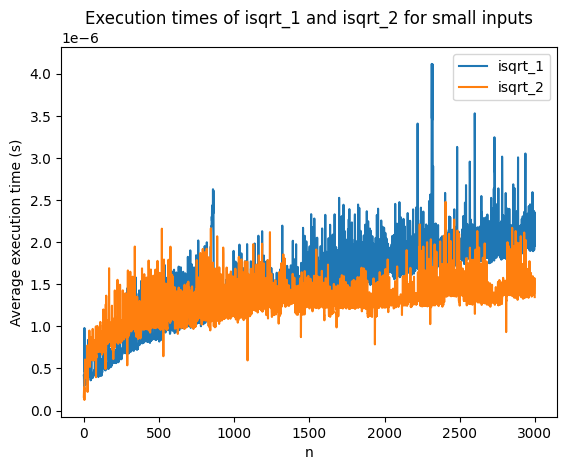

In [185]:
plt.plot(time_list_1_small, label='isqrt_1')
plt.plot(time_list_2_small, label='isqrt_2')

plt.legend()

plt.xlabel('n')
plt.ylabel('Average execution time (s)')
plt.title('Execution times of isqrt_1 and isqrt_2 for small inputs')

# Show the plot
plt.show()

## Interpretation II:

It is not always the case that a program with lower time complexity runs faster than a program with higher time complexity.
For example, the naive implementation of the integer square root is faster than the binary search based implementation for inputs smaller than about $1000$.

This suggests that – while time complexity is an important property of a program – even algorithms with higher time complexity can be used for small inputs (how small depends on the problem and the implementation).

For exploration and initial implementation a simpler algorithm with suboptimal time complexity can be used. This can be later refined to a more efficient algorithm with lower time complexity, if needed. However sometimes simpler is better. The right approach depends on the problem and the implementation.

## References and Resources:

- [Big-O Notation](https://en.wikipedia.org/wiki/Big_O_notation)

- Time complexity:
    - [Time Complexity](https://en.wikipedia.org/wiki/Time_complexity)
    - [Computational complexity of mathematical operations](https://en.wikipedia.org/wiki/Computational_complexity_of_mathematical_operations)
    - [Big-O Cheat Sheet](https://www.bigocheatsheet.com/)

- [Intorduction to Algorithms](https://www.goodreads.com/book/show/108986.Introduction_to_Algorithms)

- Coding style, readability, maintainability, "elegance":
    - Python Enhancement Proposals:
        - [PEP 8](https://www.python.org/dev/peps/pep-0008/)
        - [PEP 20](https://www.python.org/dev/peps/pep-0020/)
        - [PEP 257](https://www.python.org/dev/peps/pep-0257/)
    - [Clean Code](https://www.goodreads.com/book/show/3735293-clean-code)
    - [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html)

- Software Engineering:
    - [Software Engineering at Google](https://www.goodreads.com/book/show/48816586-software-engineering-at-google), read [online](https://abseil.io/resources/swe-book)
    - [The Pragmatic Programmer](https://www.goodreads.com/book/show/4099.The_Pragmatic_Programmer)
    - Older but uesful on the higher level:
        - [Code Complete](https://www.goodreads.com/book/show/4845.Code_Complete)
        - [Software metrics](https://www.goodreads.com/book/show/2847653-software-metrics)

- Some statistics:
    - [Most popular technologies](https://survey.stackoverflow.co/2024/technology#most-popular-technologies) Stackoverflow survey
    - [Most popular programming languages](https://www.tiobe.com/tiobe-index/) TIOBE index





